In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Downlad dataset

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=True, parser="auto")  #在新版本中加入parser="auto"來避免警告
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, Y = mnist.data[:1000], mnist.target[:1000]

In [5]:
#Store data

data = X.copy()
data['y'] = Y
data.to_csv('mnist.csv')

In [6]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Y

0      5
1      0
2      4
3      1
4      9
      ..
995    7
996    6
997    0
998    3
999    6
Name: class, Length: 1000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
Y.value_counts()

class
7    117
1    116
4    105
9    100
2     99
0     97
6     94
3     93
5     92
8     87
Name: count, dtype: int64

In [10]:
#Set trainsets & testsets

x = np.array(X)
y = np.array(Y)

In [11]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.3, stratify=y, random_state=1)

In [12]:
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((700, 784), (300, 784), (700,), (300,))

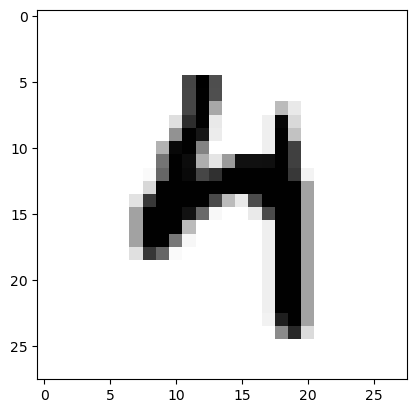

In [14]:
#檢視訓練資料

i = 0
xiImage = xTrain[i].reshape(28,28)
plt.imshow(xiImage, cmap='binary')
plt.show()

In [15]:
yTrain[i]

'4'

In [16]:
#清理與準備訓練資料

#資料標準化

from sklearn.preprocessing import StandardScaler

std = StandardScaler()
xTrainPrep = std.fit_transform(xTrain)

In [17]:
#訓練與選擇模性
#使用交叉驗證

from sklearn.model_selection import cross_val_score

In [20]:
#Softmax Regression

from sklearn.linear_model import SGDClassifier

sgdClf = SGDClassifier(loss='log_loss', random_state=1)
sgdScores = cross_val_score(sgdClf, xTrainPrep, yTrain, scoring='accuracy', cv=10)
sgdScores

array([0.78571429, 0.8       , 0.78571429, 0.88571429, 0.81428571,
       0.87142857, 0.85714286, 0.9       , 0.95714286, 0.84285714])

In [21]:
sgdScores.mean(), sgdScores.std()

(0.85, 0.052779866291174767)

In [23]:
#SVC

from sklearn.svm import SVC

svcClf = SVC(random_state=1)
svcScores = cross_val_score(svcClf, xTrainPrep, yTrain, scoring='accuracy', cv=10)
svcScores

array([0.8       , 0.8       , 0.81428571, 0.9       , 0.82857143,
       0.84285714, 0.88571429, 0.9       , 0.91428571, 0.87142857])

In [24]:
svcScores.mean(), svcScores.std()

(0.8557142857142859, 0.04162514938380989)

In [26]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rfClf = RandomForestClassifier(random_state=1)

rfScores = cross_val_score(rfClf, xTrain, yTrain, scoring='accuracy')
rfScores

array([0.83571429, 0.88571429, 0.86428571, 0.90714286, 0.91428571])

In [28]:
rfScores.mean(), rfScores.std()

(0.8814285714285715, 0.02878491668515696)

In [30]:
#調整模型

#Grid Search

from sklearn.model_selection import GridSearchCV

In [32]:
paramGrid = [
    {'n_estimators': [100, 300, 500], 'max_features': [4, 8, 12]},
    {'bootstrap': [False], 'n_estimators':[300, 500], 'max_features':[8, 12]}
]

rfClf = RandomForestClassifier(random_state=1)

gridSearch = GridSearchCV(rfClf, paramGrid, cv=5, scoring='accuracy', return_train_score=True)

gridSearch.fit(xTrain, yTrain)
gridSearch.best_params_

{'bootstrap': False, 'max_features': 8, 'n_estimators': 300}

In [34]:
rlt = gridSearch.cv_results_
for mean_score, params in zip(rlt['mean_test_score'], rlt['params']):
    print(mean_score, params)

0.8742857142857142 {'max_features': 4, 'n_estimators': 100}
0.8842857142857143 {'max_features': 4, 'n_estimators': 300}
0.8800000000000001 {'max_features': 4, 'n_estimators': 500}
0.8657142857142857 {'max_features': 8, 'n_estimators': 100}
0.8871428571428572 {'max_features': 8, 'n_estimators': 300}
0.8828571428571429 {'max_features': 8, 'n_estimators': 500}
0.8857142857142858 {'max_features': 12, 'n_estimators': 100}
0.8914285714285715 {'max_features': 12, 'n_estimators': 300}
0.8842857142857143 {'max_features': 12, 'n_estimators': 500}
0.9014285714285715 {'bootstrap': False, 'max_features': 8, 'n_estimators': 300}
0.9014285714285715 {'bootstrap': False, 'max_features': 8, 'n_estimators': 500}
0.8957142857142857 {'bootstrap': False, 'max_features': 12, 'n_estimators': 300}
0.8957142857142857 {'bootstrap': False, 'max_features': 12, 'n_estimators': 500}


In [35]:
#Pick the best model

bestModel = gridSearch.best_estimator_

In [37]:
#驗證與解釋模型

#驗證模型
#Accuracy Score

bestModel. score(xTest, yTest)

0.89

In [38]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

yTestPred = bestModel.predict(xTest)
conf = confusion_matrix(yTest, yTestPred)
conf

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1, 26,  0,  0,  0,  1,  1,  0,  0],
       [ 1,  0,  0, 25,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  2,  1, 22,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  1,  0, 27,  0,  0,  0],
       [ 0,  3,  0,  0,  1,  0,  0, 31,  0,  0],
       [ 0,  1,  0,  3,  0,  1,  1,  0, 19,  1],
       [ 1,  0,  0,  1,  0,  0,  1,  3,  0, 24]])

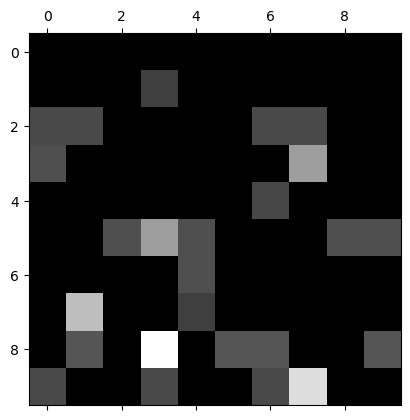

In [40]:
rowSums = conf.sum(axis=1, keepdims=True)
normConf = conf / rowSums
np.fill_diagonal(normConf, 0)
plt.matshow(normConf, cmap=plt.cm.gray)
plt.show()

In [41]:
#解釋模型

imp = bestModel.feature_importances_

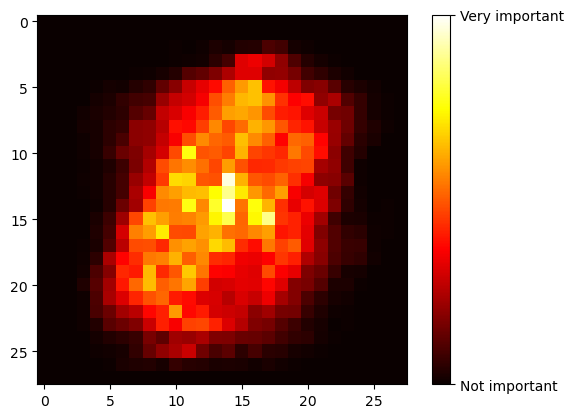

In [43]:
import matplotlib as mpl

plt.imshow(imp.reshape(28, 28), cmap=mpl.cm.hot)
cbar = plt.colorbar(ticks=[imp.min(), imp.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [44]:
#發佈模型

#最終模型整合
finalModel = bestModel

In [46]:
import joblib
joblib.dump(finalModel, 'finalModelClf.pkl')

['finalModelClf.pkl']

In [47]:
#讀取與使用模型

modelClfLoaded = joblib.load('finalModelClf.pkl')

In [48]:
modelClfLoaded.predict(xTest[:10])

array(['3', '4', '0', '6', '3', '7', '9', '6', '2', '3'], dtype=object)